In [1]:
# First, upload the libraries

# to upload the dataset, needed modules;
import pandas as pd
import numpy as np

# to visualize the dataset, needed modules;
import matplotlib.pyplot as plt
import seaborn as sns # to visualize the plots a little bit nicer
from wordcloud import WordCloud

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Dataset is uploaded by panda module
movies = pd.read_csv("movies.csv", sep = ",",  encoding = "utf-8") # to configure the files that are not encoded as UTF-8.
ratings = pd.read_csv("ratings.csv", sep = "," )
tags = pd.read_csv("tags.csv", sep = ",", encoding = "utf-8" )
links = pd.read_csv("links.csv", sep = ",")

### First, let us understand the attributes of each file in the dataset 

In [4]:
movies.nunique(axis=0)

movieId    9742
title      9737
genres      951
dtype: int64

The movies dataset consist of 3 columns which are movieId, title and genres. Each column is comprised of 9742, 9737 and 951 different rows respectively.

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.shape

(9742, 3)

Movies dataset consists of 9742 rows and 3 columns in total.

In [7]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

Above it can be seen that there is no missing data in these rows or columns of movies dataset. 

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
movies.describe(include="all")

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Emma (1996),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


The total number of movies is 9742 and the average (mean) of the movie Id is 42200.
Minimum Id number is 1.0 whereas the maximum Id number is 193609.0.

In [71]:
def get_year(row):
    try:
        return int(row['title'].rstrip(' ')[-5:-1])
    except: 
        if row['title'].rstrip(' ') != ')':
            return None
        else:
            raise

In [72]:
movies['year'] = movies.apply(get_year, axis=1)

## All Movies in Chronological Order

In [73]:
movies = movies.sort_values('year').drop(columns=['year']).reset_index(drop=True)
movies 

,movieId,title,genres
0,32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action|Adventure|Fantasy|Sci-Fi
1,49389,The Great Train Robbery (1903),Crime|Western
2,140541,The Electric Hotel (1908),Animation|Comedy|Sci-Fi
3,7065,"Birth of a Nation, The (1915)",Drama|War
4,102747,"Rink, The (1916)",Comedy
...,...,...,...
9737,167570,The OA,(no genres listed)
9738,171495,Cosmos,(no genres listed)
9739,171631,Maria Bamford: Old Baby,(no genres listed)
9740,171891,Generation Iron 2,(no genres listed)


In [13]:
links.nunique(axis=0)

movieId    9742
imdbId     9742
tmdbId     9733
dtype: int64

The links dataset consist of 3 columns which are movieId, imdbId and tmbdId. Each column is comprised of 9742, 9742 and 9733 different rows respectively.

In [14]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


Links dataset shows the imdb and tmbd Id of each movies.

In [15]:
links.shape

(9742, 3)

Links dataset consists of 9742 rows and 3 columns.

In [16]:
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

**There are 8 missing data in tmdbId column of links dataset.**

In [17]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [18]:
links.describe(include="all")

,movieId,imdbId,tmdbId
count,9742.000000,9.742000e+03,9734.000000
mean,42200.353623,6.771839e+05,55162.123793
std,52160.494854,1.107228e+06,93653.481487
min,1.000000,4.170000e+02,2.000000
25%,3248.250000,9.518075e+04,9665.500000
50%,7300.000000,1.672605e+05,16529.000000
75%,76232.000000,8.055685e+05,44205.750000
max,193609.000000,8.391976e+06,525662.000000


### Ratings Analysis

In [74]:
ratings.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
dtype: int64

The ratings dataset consist of 4 columns which are userId, movieId, rating and timestamp. Each column is comprised of 610, 9724, 10 and 85043 different rows respectively.

In [75]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [21]:
ratings.shape

(100836, 4)

Ratings dataset consists of 100.836 rows and 4 columns.

In [22]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Above it can be seen that there is no missing data in these rows or columns of rating dataset.

In [23]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [24]:
ratings.describe(include="all")

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


The sum of the ratings is 100836 and the average (mean) of the ratings is 3.501557. Standard deviation of the ratings is 1.042529, lowest rating is 1.0 whereas the highest rating is 5.0. 25% of the movies are rated below 3.0, 50% of the movies are rated below 3.5 and 75% of the movies rated below 4.0.

Maximum number of user Id indicates that 610 different viewership rated movies in this dataset.

In [25]:
user_num = ratings.groupby('userId').size().sort_values()
user_num

userId
442      20
406      20
147      20
194      20
569      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Length: 610, dtype: int64

Here, it can be seen how many movies have been rated by each user. User 414 rated the most movies with 2698 movies.

In [26]:
rating_num = ratings.groupby('rating').size().sort_values(ascending=False)
rating_num

rating
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
dtype: int64

The most voted rating is 4.0 with 26818 movies. The least voted rating,on the other hand, is 0.5 with 1370 movies. 

### Pie Chart Representation of Rating Distribution of Movies

Text(0.5, 1.0, 'rating distribution of movies')

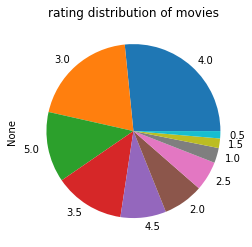

In [27]:
rating_num.plot.pie(y='rating')
plt.title('rating distribution of movies')

## The Highest Rated Movies

In [28]:
movie_rating = ratings.groupby(['movieId'], as_index=False)
movie_ratings_mean = movie_rating.agg({'rating':'mean'})
movies_ranks = movie_ratings_mean.sort_values('rating', ascending=False)
movies_ranks

,movieId,rating
7638,88448,5.0
8089,100556,5.0
9065,143031,5.0
9076,143511,5.0
9078,143559,5.0
...,...,...
9253,157172,0.5
7536,85334,0.5
6486,53453,0.5
5200,8494,0.5


Here, movies are ordered from the highest ratings to lowest ratings.

### Movies with genre from highest to lowest ratings

In [29]:
ranked_movies=pd.merge(movies_ranks, movies, how='left', left_on=['movieId'], right_on=['movieId'])
ranked_movies

,movieId,rating,title,genres
0,88448,5.0,Paper Birds (Pájaros de papel) (2010),Comedy|Drama
1,100556,5.0,"Act of Killing, The (2012)",Documentary
2,143031,5.0,Jump In! (2007),Comedy|Drama|Romance
3,143511,5.0,Human (2015),Documentary
4,143559,5.0,L.A. Slasher (2015),Comedy|Crime|Fantasy
...,...,...,...,...
9719,157172,0.5,Wizards of the Lost Kingdom II (1989),Action|Fantasy
9720,85334,0.5,Hard Ticket to Hawaii (1987),Action|Comedy
9721,53453,0.5,Starcrash (a.k.a. Star Crash) (1978),Action|Adventure|Fantasy|Sci-Fi
9722,8494,0.5,"Cincinnati Kid, The (1965)",Drama


### The Most Popular Genres

In [30]:
genre = ranked_movies.groupby(['genres'], as_index=False)
genre_ratings_mean = genre.agg({'rating':'mean'})
genre_popularity = genre_ratings_mean.sort_values('rating', ascending=False)
genre_popularity

,genres,rating
673,Comedy|Drama|Fantasy|Mystery|Romance,5.0
564,Animation|Crime|Drama,5.0
575,Animation|Drama|Sci-Fi|IMAX,5.0
235,Action|Crime|Drama|Sci-Fi,5.0
312,Action|Horror|Mystery|Sci-Fi,5.0
...,...,...
785,Crime|Horror|Sci-Fi,0.5
73,Action|Adventure|Comedy|Sci-Fi|IMAX,0.5
630,Children|Horror|Sci-Fi,0.5
211,Action|Comedy|Horror|Musical,0.5


In [31]:
genres = []
for i in movies.genres:
    i = i.split('|')
    if i not in genres:
        genres.append(i)
genres

[['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
 ['Crime', 'Western'],
 ['Animation', 'Comedy', 'Sci-Fi'],
 ['Drama', 'War'],
 ['Comedy'],
 ['Drama'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Fantasy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Crime', 'Fantasy', 'Horror'],
 ['Horror'],
 ['Drama', 'Horror'],
 ['Action', 'Comedy', 'Romance'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Drama', 'Fantasy', 'Romance', 'Sci-Fi', 'Thriller'],
 ['Comedy', 'Fantasy', 'Romance'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Comedy', 'Romance'],
 ['Drama', 'Fantasy', 'Horror'],
 ['Comedy', 'War'],
 ['Horror', 'Mystery'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Musical', 'Romance'],
 ['Drama', 'Romance'],
 ['Crime', 'Drama', 'Thriller'],
 ['Animation', 'Children', 'Comedy', 'Musical'],
 ['Comedy', 'Romance'],
 ['Documentary'],
 ['Comedy', 'Musical'],
 ['Musical'],
 ['Fantasy'],
 ['Action', 'Drama', 'War'],
 ['Comedy', 'Drama', 'Romance'],
 ['Mystery'],
 ['Crime', 'Film-Noir', 'Thriller

In [32]:
word_cloud=WordCloud(width=2000,height=1000,background_color='white',min_font_size=1,min_word_length=3).generate(str(genres))

**The Word Cloud of Genre**

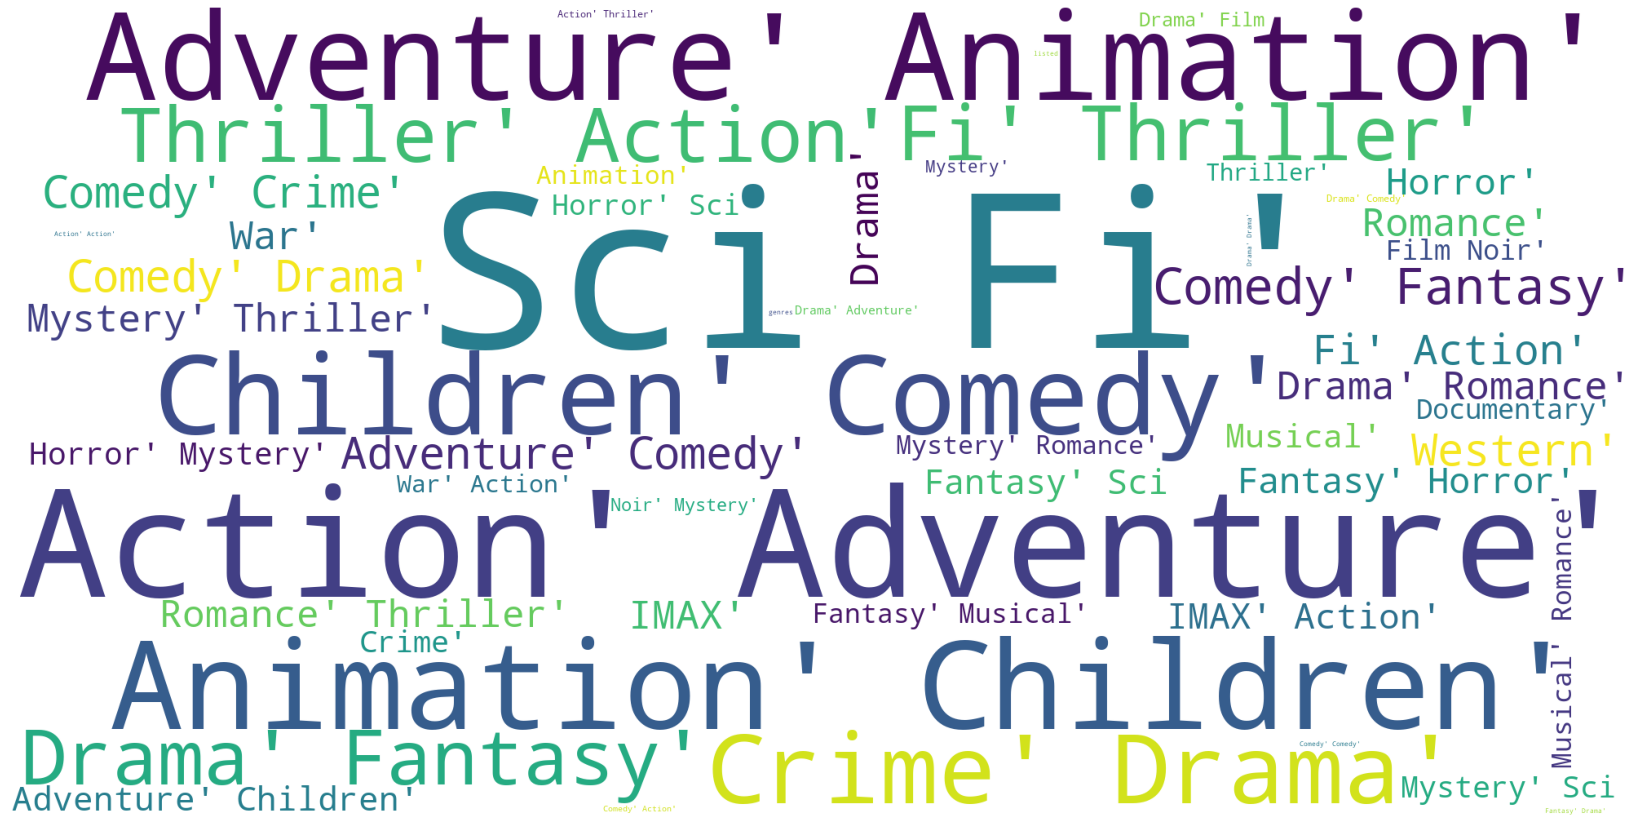

In [33]:
plt.figure(figsize=(30,15))
plt.axis('off')
plt.imshow(word_cloud);

### Movies that have the highest rating sum

In [34]:
movies_rating = pd.merge(ratings, movies, how='left',on='movieId')
most_rated = movies_rating.groupby(['title'])[['rating']].sum()
most_rated = most_rated.nlargest(10,'rating')
most_rated.head(10)

,rating
title,
"Shawshank Redemption, The (1994)",1404.0
Forrest Gump (1994),1370.0
Pulp Fiction (1994),1288.5
"Matrix, The (1999)",1165.5
"Silence of the Lambs, The (1991)",1161.0
Star Wars: Episode IV - A New Hope (1977),1062.0
Braveheart (1995),955.5
Fight Club (1999),931.5
Schindler's List (1993),929.5


Shawshank Redemption has the highest rating sum that is 1404 among all the movies.

## Bar Chart of the Top 10 Movies with Highest Rating Sum

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


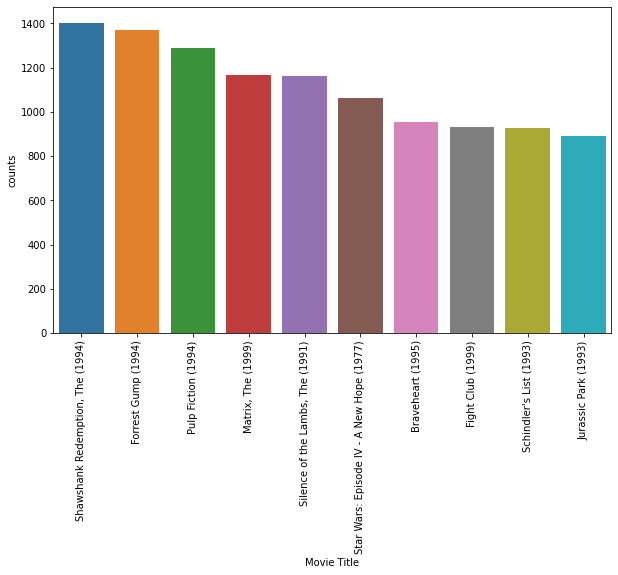

In [35]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90);
sns.barplot(most_rated.index, most_rated['rating']);
plt.ylabel('counts');
plt.xlabel('Movie Title');

### Tags

In [37]:
tags.nunique(axis=0)

userId         58
movieId      1572
tag          1589
timestamp    3411
dtype: int64

The tags dataset consist of 3 columns which are userId, movieId, tag and timestamp. Each column is comprised of 58, 1572,1589 and 3411 different rows respectively.

In [38]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [39]:
tags.shape

(3683, 4)

Tags dataset consists of 3683 rows and 4 columns.

In [40]:
tags.isnull().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Above it can be seen that there is no missing data in these rows or columns of tags dataset.

In [41]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [42]:
tags.describe(include="all")

,userId,movieId,tag,timestamp
count,3683.000000,3683.000000,3683,3.683000e+03
unique,NaN,NaN,1589,NaN
top,NaN,NaN,In Netflix queue,NaN
freq,NaN,NaN,131,NaN
mean,431.149335,27252.013576,NaN,1.320032e+09
std,158.472553,43490.558803,NaN,1.721025e+08
min,2.000000,1.000000,NaN,1.137179e+09
25%,424.000000,1262.500000,NaN,1.137521e+09
50%,474.000000,4454.000000,NaN,1.269833e+09
75%,477.000000,39263.000000,NaN,1.498457e+09


There are 3683 tags and 1589 of them are different from each other. The most popular tag is "In Netflix Queue".

### The most popular tags

In [43]:
tags['tag'].value_counts()

In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
                    ... 
small towns            1
In Your Eyes           1
Lloyd Dobbler          1
weak plot              1
Heroic Bloodshed       1
Name: tag, Length: 1589, dtype: int64

**Number of tags that are rated by some viewership:**

In [44]:
tags_users=tags.groupby('userId').size().sort_values(ascending=False)
tags_users

userId
474    1507
567     432
62      370
599     323
477     280
424     273
537     100
125      48
357      45
318      41
184      35
573      31
193      20
18       16
119      14
336      10
2         9
305       8
606       7
327       7
166       6
419       5
103       5
356       5
462       5
21        4
132       4
289       4
291       4
435       4
439       3
177       3
487       3
506       3
513       3
533       3
49        3
509       3
112       3
610       3
205       3
226       3
319       3
341       2
256       2
63        2
76        2
520       2
106       2
138       2
288       1
274       1
300       1
543       1
7         1
161       1
600       1
167       1
dtype: int64

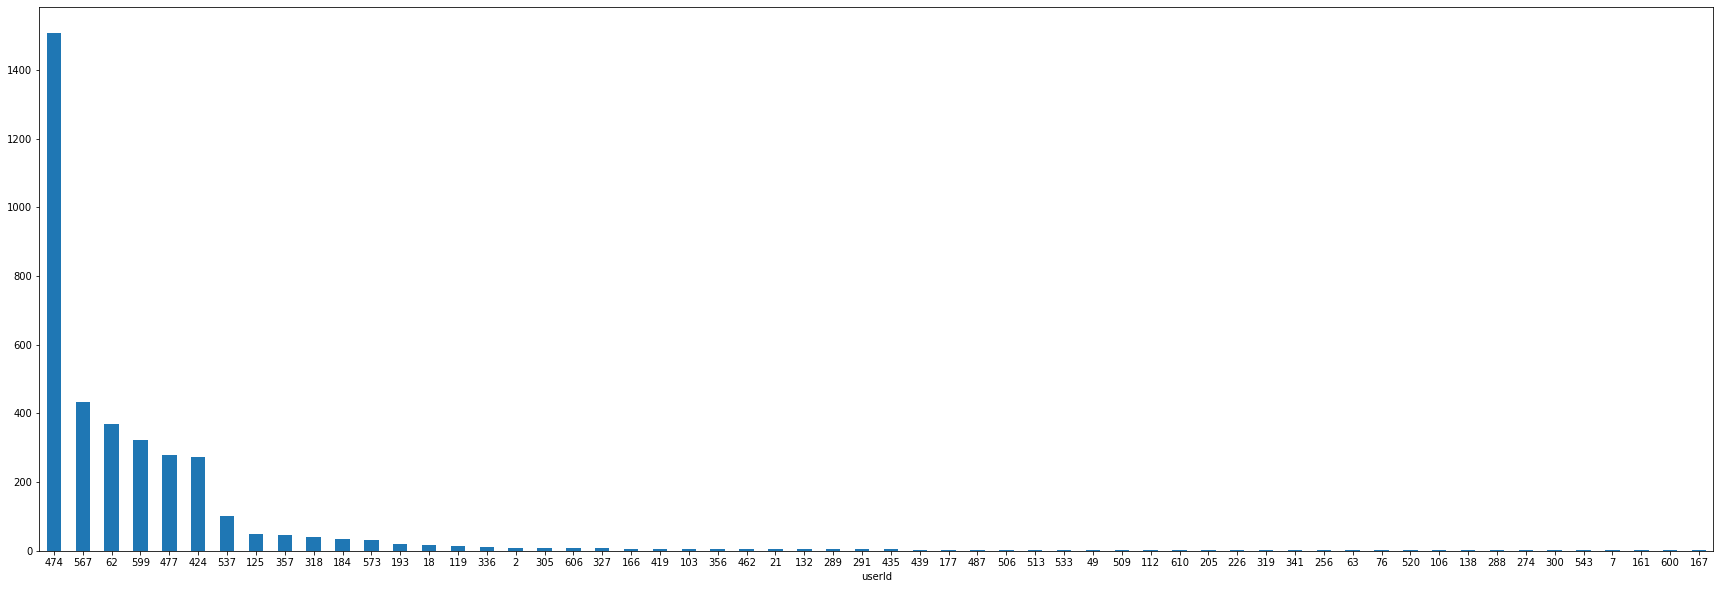

In [45]:
ax = tags_users.plot.bar(x='userId', rot=0, figsize=(30,10))

The viewer 474 rated the most with 1507 tags. The second-ranked viewer with a big difference between them rated for 432 tags that describe the movies.

### The Highest Rated Tags

In [46]:
tags_rating = tags.groupby(['movieId'], as_index=False)

In [47]:
id_ratings = []
for id_ in tags['movieId']:
    try:
        id_ratings.append(ranked_movies.set_index('movieId').loc[id_]['rating'])
    except KeyError:
        id_ratings.append(None)

In [48]:
tags['ratings'] = id_ratings

In [49]:
tags.groupby(['tag'], as_index=False)[['ratings']].mean().sort_values('ratings').set_index('tag').dropna()

,ratings
tag,
symbolic,0.500000
shark,1.416667
stage,1.750000
Tokyo,2.000000
SNL,2.100000
...,...
creativity,5.000000
human rights,5.000000
no dialogue,5.000000


The lowest rated tag is "symbolic".

##  Correlations between the movies and the movie of interest

In [50]:
merge = pd.merge(movies, ratings)

In [51]:
pivot_table = merge.pivot_table(index = ["userId"], columns = ["title"], values = "rating")
pivot_table.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
movie_interest = pivot_table["Inception (2010)"]
similarity = pivot_table.corrwith(movie_interest) 
similarity = similarity.sort_values(ascending = False)
similarity

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Suspiria (1977)                                           1.0
Summer Wars (Samâ wôzu) (2009)                            1.0
Swimfan (2002)                                            1.0
Prophecy, The (1995)                                      1.0
Micmacs (Micmacs à tire-larigot) (2009)                   1.0
                                                         ... 
Zulu (1964)                                               NaN
Zulu (2013)                                               NaN
[REC]³ 3 Génesis (2012)                                   NaN
anohana: The Flower We Saw That Day - The Movie (2013)    NaN
À nous la liberté (Freedom for Us) (1931)                 NaN
Length: 9719, dtype: float64

The output is the movies that are similar to the movie "Inception". This "movie recommendation system" works according to users ratings. It checks which other movies are rated by those who rated "Inception". 

### Analysis of my favorite movie 'Interstellar'

In [53]:
print(movies.loc[movies['title'] == 'Interstellar (2014)'])

      movieId                title       genres
8376   109487  Interstellar (2014)  Sci-Fi|IMAX


**Users who rated the movie "Interstellar" from highest to lowest rating.**

In [54]:
Interstellar = ratings[ratings.movieId==109487].sort_values('rating', ascending=False)
Interstellar

,userId,movieId,rating,timestamp
37297,249,109487,5.0,1430996944
52343,339,109487,5.0,1460182070
41212,279,109487,5.0,1506394813
88973,573,109487,5.0,1415675757
27174,184,109487,5.0,1537099534
...,...,...,...,...
3585,21,109487,3.0,1423422297
46687,306,109487,3.0,1518380445
7346,50,109487,2.5,1527372052
1249,10,109487,0.5,1455398092


There are 73 rows in Interstellar dataset which shows 73 viewers rated this movie.

In [55]:
Interstellar.describe()

,userId,movieId,rating,timestamp
count,73.000000,73.0,73.000000,7.300000e+01
mean,307.945205,109487.0,3.993151,1.471674e+09
std,189.417887,0.0,0.973586,3.658894e+07
min,2.000000,109487.0,0.500000,1.415676e+09
25%,125.000000,109487.0,3.500000,1.445348e+09
50%,306.000000,109487.0,4.000000,1.461352e+09
75%,487.000000,109487.0,5.000000,1.498030e+09
max,610.000000,109487.0,5.000000,1.537100e+09


The sum of the ratings is 73.000.000. The maximum rating that is given is 5.0 whereas the minimum is 0.5 The average of the rating is 3.99. 25% of the viewers rated below 3.5, 50% of the viewers rated below 4.0 and 75% of the viewers rated below 5.0.

In [56]:
Interstellar_viewership=Interstellar.groupby('rating').size()
Interstellar_viewership

rating
0.5     2
2.5     1
3.0    14
3.5    11
4.0    12
4.5    11
5.0    22
dtype: int64

Text(0, 0.5, 'Number of viewership')

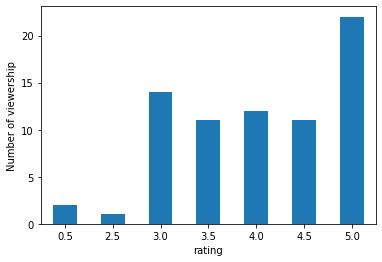

In [57]:
Interstellar = Interstellar_viewership.plot.bar(x='Interstellar_viewership' ,y='rating', rot=0)
plt.ylabel('Number of viewership')

22 people rated Interstellar a 5.0. 

## Similiar movies with Interstellar according to movie recommendation system

In [58]:
movie_interest = pivot_table["Interstellar (2014)"]
similarity = pivot_table.corrwith(movie_interest) 
similarity = similarity.sort_values(ascending = False)
similarity.head()

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2821: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
Iron Monkey (Siu nin Wong Fei-hung ji: Tit Ma Lau) (1993)    1.0
Misérables, Les (2000)                                       1.0
Elephant (2003)                                              1.0
Mumford (1999)                                               1.0
End of Days (1999)                                           1.0
dtype: float64